In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")

## Часть 1

In [3]:
df1 = pd.read_csv('СИА Модуль _Разведочный анализ_ данные - Стоимость аренды квартир.csv', index_col=False)

Text(0, 0.5, 'Количество')

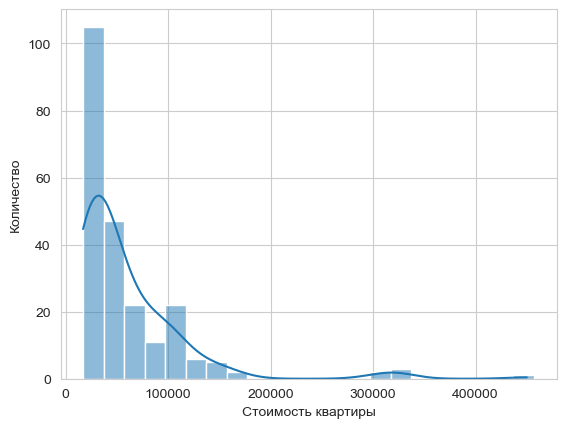

In [4]:
sns.histplot(df1, x=df1['Стоимость квартиры'], binwidth=20_000, kde=True)
plt.ylabel('Количество')

### Нормализация

In [5]:
apartment_price = df1[df1['Стоимость квартиры'] < df1['Стоимость квартиры'].quantile(.95)]['Стоимость квартиры']

Text(0, 0.5, 'Количество')

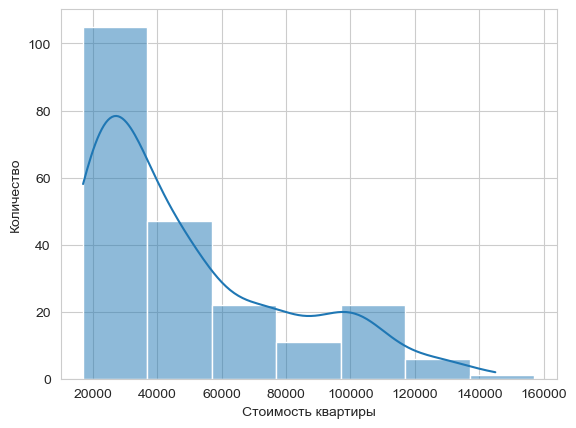

In [6]:
sns.histplot(df1, x=apartment_price, binwidth=20_000, kde=True)
plt.ylabel('Количество')

## Часть 2

In [7]:
df2 = pd.read_csv('Данные для задания 2.xlsx - Данные.csv')

In [8]:
df2 = df2.rename(columns=df2.iloc[0])
df2 = df2.drop([0])
df2.head()

,region,w_marst,w_occup08,w_diplom,w_age,wh5,wh6,wj1,wj4.1,wj6.2,wj10,wm71,wm80.0,wm80,wm151,wm152,wm114
1,1,1,NaN,3,74,2,1944,5,NaN,NaN,NaN,2,1,2,5,1,99999995
2,1,2,NaN,2,64,2,1954,5,NaN,NaN,NaN,2,1,1,5,1,99999995
3,1,2,8,4,50,2,1968,1,7,40,"15000,00","15000,00",1,2,2,2,2
4,1,2,NaN,4,60,2,1958,5,NaN,NaN,NaN,2,1,2,5,1,99999995
5,1,2,8,4,64,1,1954,1,8,48,"20000,00",2,1,1,5,2,99999995


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 1 to 12160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     12160 non-null  object
 1   w_marst    10311 non-null  object
 2   w_occup08  5067 non-null   object
 3   w_diplom   10311 non-null  object
 4   w_age      12160 non-null  object
 5   wh5        12160 non-null  object
 6   wh6        12160 non-null  object
 7   wj1        10311 non-null  object
 8   wj4.1      5067 non-null   object
 9   wj6.2      5067 non-null   object
 10  wj10       4890 non-null   object
 11  wm71       10311 non-null  object
 12  wm80.0     10311 non-null  object
 13  wm80       5904 non-null   object
 14  wm151      10311 non-null  object
 15  wm152      10311 non-null  object
 16  wm114      10311 non-null  object
dtypes: object(17)
memory usage: 1.6+ MB


**1 группа** - имеющие образование среднее и ниже

**2 группа** - имеющие среднее специальное или высшее образование

Для формирования выборки использовать признаки:
- Регион
- ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)
- Ваше основное занятие в настоящее время? = 1 | Вы сейчас работаете
- Сколько денег в течение последних 30 дней Вы получили по основному месту работы после вычета налогов и отчислений? Если все или часть денег Вы получили в иностранной валюте, переведите все в рубли и назовите общую сумму


In [10]:
def str_to_float(value):
    try:
        return float(value.replace(',', '.'))
    except (ValueError, AttributeError):
        return None

In [11]:
df2 = df2.applymap(str_to_float)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 1 to 12160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     12160 non-null  float64
 1   w_marst    10311 non-null  float64
 2   w_occup08  5067 non-null   float64
 3   w_diplom   10311 non-null  float64
 4   w_age      12160 non-null  float64
 5   wh5        12160 non-null  float64
 6   wh6        12160 non-null  float64
 7   wj1        10311 non-null  float64
 8   wj4.1      5067 non-null   float64
 9   wj6.2      5067 non-null   float64
 10  wj10       4890 non-null   float64
 11  wm71       10311 non-null  float64
 12  wm80.0     10311 non-null  float64
 13  wm80       5904 non-null   float64
 14  wm151      10311 non-null  float64
 15  wm152      10311 non-null  float64
 16  wm114      10311 non-null  float64
dtypes: float64(17)
memory usage: 1.6 MB


In [13]:
group1 = df2[(df2.region == 141) & 
             (df2.wj1 == 1) & 
             (df2.w_diplom <= 4)]

group2 = df2[(df2.region == 141) & 
             (df2.wj1 == 1) & 
             ((df2.w_diplom == 5) | (df2.w_diplom == 6))]

In [14]:
group1 = group1[['wj10', 'wj6.2']]
group1 = group1[group1 < 99_999_997].dropna()

In [15]:
group2 = group2[['wj10', 'wj6.2']]
group2 = group2[group2 < 99_999_997].dropna()

In [16]:
group1.shape, group2.shape

((58, 2), (82, 2))

In [17]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2276 to 12160
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wj10    58 non-null     float64
 1   wj6.2   58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


#### Задание 1

- **Нулевая гипотеза (H0)**: Средние значения во всех группах равны, т.е., различий между группами нет.
- **Альтернативная гипотеза (H1)**: Средние значения хотя бы в одной из групп различаются от средних значений в других группах.

In [18]:
a1, a2 = group1['wj10'], group2['wj10']

Text(0.5, 1.0, 'Сравнение зарплат двух групп')

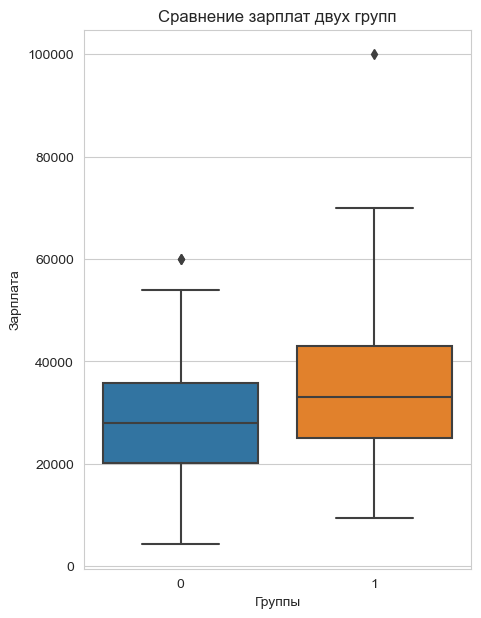

In [19]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=[a1, a2])
plt.ylabel('Зарплата')
plt.xlabel('Группы')
plt.title('Сравнение зарплат двух групп')

Text(0.5, 1.0, 'Распределение зарплат двух групп')

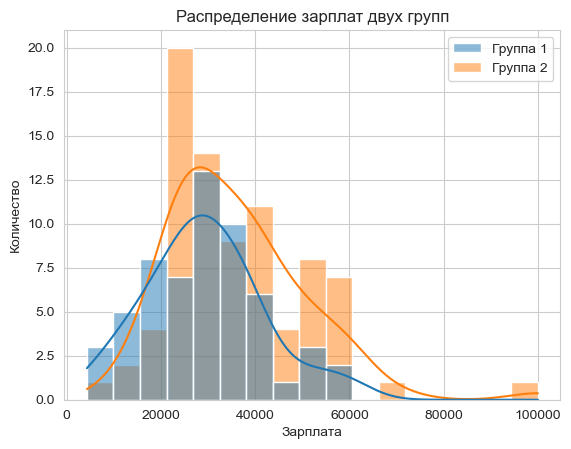

In [20]:
sns.histplot(data={'Группа 1': a1, 'Группа 2': a2}, kde=True)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение зарплат двух групп')

In [21]:
# однофакторный дисперсионный анализ
f_statistic, p_value_1 = sp.f_oneway(a1, a2)

# Проведение t-теста
t_statistic_2, p_value_2 = sp.ttest_ind(a1, a2)

In [22]:
result2 = pd.DataFrame([[p_value_1, p_value_2], [f_statistic, t_statistic_2]], 
                        columns=['p-value', 'statistic'], index=['f-value', 'T-test'])
result2

,p-value,statistic
f-value,0.005187,0.005187
T-test,8.068225,-2.840462


#### Задание 2

In [23]:
b1, b2 = group1['wj6.2'], group2['wj6.2']

In [24]:
b1.shape, b2.shape

((58,), (82,))

Text(0.5, 1.0, 'Сравнение рабочих часов двух групп')

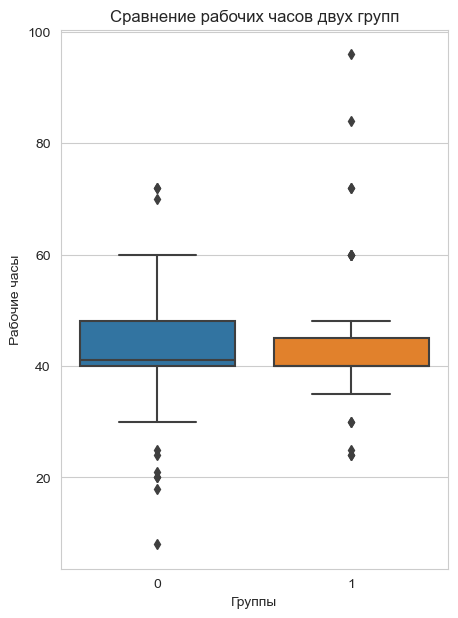

In [25]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=[b1, b2])
plt.ylabel('Рабочие часы')
plt.xlabel('Группы')
plt.title('Сравнение рабочих часов двух групп')

Text(0.5, 1.0, 'Распределение рабочих часов двух групп')

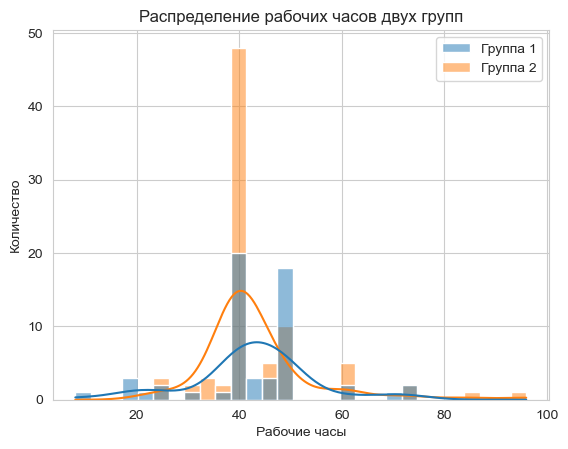

In [26]:
sns.histplot(data={'Группа 1': b1, 'Группа 2': b2}, kde=True)
plt.ylabel('Количество')
plt.xlabel('Рабочие часы')
plt.title('Распределение рабочих часов двух групп')

In [27]:
# однофакторный дисперсионный анализ
f_statistic, p_value_3 = sp.f_oneway(b1, b2)

# Проведение t-теста
t_statistic_4, p_value_4 = sp.ttest_ind(b1, b2)

In [28]:
result2 = pd.DataFrame([[p_value_3, p_value_4], [f_statistic, t_statistic_4]], 
                        columns=['p-value',  'statistic'], index=['f-value', 'T-test'])
result2

,p-value,statistic
f-value,0.680109,0.680109
T-test,0.170725,-0.413189
